In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/NLP_praktikum/Sentiment Analysis/ReviewTerbaru.xlsx', sheet_name='Hutan Pinus Limpakuwus')

In [ ]:
df = df.drop(columns=['Nama', 'Waktu', 'Rating'])


In [ ]:
df

,Review
0,"Akses jalan luas dan mudah, bisa mobil dan mot..."
1,Recomended buat liburan bersama keluarga.. Tem...
2,"Sudah beberapa kali datang kesini, tempat wisa..."
3,Hutan pinus milik perhutani yang difungsikan u...
4,"Sebenarnya tempatnya oke bht,cuma ko apa2 baya..."
...,...
175,NaN
176,NaN
177,NaN
178,NaN


In [ ]:
df = df.dropna()

In [ ]:
df.columns

Index(['Review'], dtype='object')

In [ ]:
def casefolding(text):
  text = text.lower()
  return text

df['Review'] = df['Review'].apply(casefolding)

<ipython-input-8-bd1681a1acad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'] = df['Review'].apply(casefolding)


In [ ]:
import re
import string

def clean(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', str(text))
  text = re.sub(r'#[A-Za-z0-9]+', '', str(text))
  text = re.sub(r'RT[\s]', '', str(text))
  text = re.sub(r'diterjemahkan oleh google', '', str(text))
  text = re.sub(r'http\S+', '', str(text))
  text = re.sub(r'[0-9]+', '', str(text))
  text = re.sub(r'\s+[a-zA-Z]\s+', '', str(text))#remove single character


  text = text.replace('\n', ' ')
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = text.strip(' ')
  return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002700-\U000027BF"  # Dingbats
            u"\U0001F600-\U0001F64F" # emoticons
            u"\U00002500-\U00002BEF" # chinese char
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f" # dingbats
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['cleaned Review']  = df['Review'].apply(clean)
df['cleaned Review'] = df['cleaned Review'].apply(remove_emoji)



<ipython-input-9-ac54d2cca945>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned Review']  = df['Review'].apply(clean)
<ipython-input-9-ac54d2cca945>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned Review'] = df['cleaned Review'].apply(remove_emoji)


In [ ]:
df

,Review,cleaned Review
0,"akses jalan luas dan mudah, bisa mobil dan mot...",akses jalan luas dan mudah bisa mobil dan moto...
1,recomended buat liburan bersama keluarga.. tem...,recomended buat liburan bersama keluarga tempa...
2,"sudah beberapa kali datang kesini, tempat wisa...",sudah beberapa kali datang kesini tempat wisat...
3,hutan pinus milik perhutani yang difungsikan u...,hutan pinus milik perhutani yang difungsikan u...
4,"sebenarnya tempatnya oke bht,cuma ko apa2 baya...",sebenarnya tempatnya oke bhtcuma ko apa bayar ...
...,...,...
160,(diterjemahkan oleh google) menarik keren dan ...,menarik keren dan cantik asli menarik sejuk d...
161,(diterjemahkan oleh google) ademmm ... (asli)...,ademmm asli ademmm
162,(diterjemahkan oleh google) cantik untuk berke...,cantik untuk berkemah asli beautiful for camping
163,(diterjemahkan oleh google) dicampuradukkan (...,dicampuradukkan asli segeerrr


In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
kamus = [['gue', 'aku'],
         ['elo', 'kamu'],
         ['good', 'bagus'],
         ['ademmm', 'adem'],
         ['segeerrr', 'segar'],
         ['beautiful', 'cantik']
         ]
def konversi_slangword(kalimat, kamus):
  kalimatbaru=''
  if len(kalimat)>0:
    for kata in word_tokenize(kalimat):
      katabaru= kata.strip()
      for i in range(len(kamus)):
        if katabaru==kamus[i][0]:
          katabaru=kamus[i][1]
      kalimatbaru=kalimatbaru+' '+katabaru
  return kalimatbaru

df['cleaned Review'] = df['cleaned Review'].apply(konversi_slangword, kamus=kamus)

<ipython-input-15-f6a4a5284653>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned Review'] = df['cleaned Review'].apply(konversi_slangword, kamus=kamus)


In [ ]:
def tokenize(text):
  text = word_tokenize(text)
  return text

df['tokenize'] = df['cleaned Review'].apply(tokenize)

<ipython-input-16-5b8b56bb7ac9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenize'] = df['cleaned Review'].apply(tokenize)


In [ ]:
df

,Review,cleaned Review,tokenize
0,"akses jalan luas dan mudah, bisa mobil dan mot...",akses jalan luas dan mudah bisa mobil dan mot...,"[akses, jalan, luas, dan, mudah, bisa, mobil, ..."
1,recomended buat liburan bersama keluarga.. tem...,recomended buat liburan bersama keluarga temp...,"[recomended, buat, liburan, bersama, keluarga,..."
2,"sudah beberapa kali datang kesini, tempat wisa...",sudah beberapa kali datang kesini tempat wisa...,"[sudah, beberapa, kali, datang, kesini, tempat..."
3,hutan pinus milik perhutani yang difungsikan u...,hutan pinus milik perhutani yang difungsikan ...,"[hutan, pinus, milik, perhutani, yang, difungs..."
4,"sebenarnya tempatnya oke bht,cuma ko apa2 baya...",sebenarnya tempatnya oke bhtcuma ko apa bayar...,"[sebenarnya, tempatnya, oke, bhtcuma, ko, apa,..."
...,...,...,...
160,(diterjemahkan oleh google) menarik keren dan ...,menarik keren dan cantik asli menarik sejuk d...,"[menarik, keren, dan, cantik, asli, menarik, s..."
161,(diterjemahkan oleh google) ademmm ... (asli)...,adem asli adem,"[adem, asli, adem]"
162,(diterjemahkan oleh google) cantik untuk berke...,cantik untuk berkemah asli cantik for camping,"[cantik, untuk, berkemah, asli, cantik, for, c..."
163,(diterjemahkan oleh google) dicampuradukkan (...,dicampuradukkan asli segar,"[dicampuradukkan, asli, segar]"


In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 7.6 MB/s 


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stopSastra(text):
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  text = stopword.remove(text)
  return text

df['stopword'] = df['cleaned Review'].apply(stopSastra)

<ipython-input-19-7b992cab5992>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopword'] = df['cleaned Review'].apply(stopSastra)


In [ ]:
def stopword_rem(text):
  stopword = ['tak', 'jd', 'per', 'nya', 'yg', 'dpt', 'sdh', 'ga','gak', 'tk', 'ttp', 'tp', 'apa', 'bhtcuma', 'cuma', 'ko', 'kok', 'kali', 'beberapa', 'bbrp', 'kapan']
  text = text.split()
  clean=[]
  for t in text:
    if t not in stopword:
      clean.append(t)
      text = clean
  return text


In [ ]:
df['stopword'] = df['stopword'].apply(stopword_rem)

<ipython-input-21-1f87811810a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopword'] = df['stopword'].apply(stopword_rem)


In [ ]:
df

,Review,cleaned Review,tokenize,stopword
0,"akses jalan luas dan mudah, bisa mobil dan mot...",akses jalan luas dan mudah bisa mobil dan mot...,"[akses, jalan, luas, dan, mudah, bisa, mobil, ...","[akses, jalan, luas, mudah, mobil, motor, tike..."
1,recomended buat liburan bersama keluarga.. tem...,recomended buat liburan bersama keluarga temp...,"[recomended, buat, liburan, bersama, keluarga,...","[recomended, buat, liburan, bersama, keluarga,..."
2,"sudah beberapa kali datang kesini, tempat wisa...",sudah beberapa kali datang kesini tempat wisa...,"[sudah, beberapa, kali, datang, kesini, tempat...","[datang, kesini, tempat, wisata, sangat, nyama..."
3,hutan pinus milik perhutani yang difungsikan u...,hutan pinus milik perhutani yang difungsikan ...,"[hutan, pinus, milik, perhutani, yang, difungs...","[hutan, pinus, milik, perhutani, difungsikan, ..."
4,"sebenarnya tempatnya oke bht,cuma ko apa2 baya...",sebenarnya tempatnya oke bhtcuma ko apa bayar...,"[sebenarnya, tempatnya, oke, bhtcuma, ko, apa,...","[sebenarnya, tempatnya, oke, bayar, simasuk, k..."
...,...,...,...,...
160,(diterjemahkan oleh google) menarik keren dan ...,menarik keren dan cantik asli menarik sejuk d...,"[menarik, keren, dan, cantik, asli, menarik, s...","[menarik, keren, cantik, asli, menarik, sejuk,..."
161,(diterjemahkan oleh google) ademmm ... (asli)...,adem asli adem,"[adem, asli, adem]","[adem, asli, adem]"
162,(diterjemahkan oleh google) cantik untuk berke...,cantik untuk berkemah asli cantik for camping,"[cantik, untuk, berkemah, asli, cantik, for, c...","[cantik, berkemah, asli, cantik, for, camping]"
163,(diterjemahkan oleh google) dicampuradukkan (...,dicampuradukkan asli segar,"[dicampuradukkan, asli, segar]","[dicampuradukkan, asli, segar]"


In [ ]:
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence


df['stopword'] = df['stopword'].apply(toSentence)

<ipython-input-23-48a9295b19db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopword'] = df['stopword'].apply(toSentence)


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stem(text):
  stemmer = StemmerFactory().create_stemmer()
  hasil = []
  for i in text:
    txt = stemmer.stem(i)
    hasil.append(txt)
    text = hasil
  return text

df['stemming'] = df['stopword'].apply(stem)


<ipython-input-24-2525bc8d88e2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemming'] = df['stopword'].apply(stem)


In [ ]:
df.to_excel('PREPROCESS_Review Limpakuwus_Muhammad Abdul Latief.xlsx')

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/NLP_praktikum/Sentiment Analysis/NRC.xlsx', sheet_name='dict')

In [ ]:
data

,English (en),Indonesian (id),Javanese (jw),Malay (ms),Sundanese (su),Tagalog (Filipino) (tl),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,kembali,aback,abak,aback,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,sempoa,abacus,abacus,abacus,abako,0,0,0,0,0,0,0,0,0,1
2,abandon,mengabaikan,nglirwaaken,abaikan,ninggalkeun,abandunahin,0,1,0,0,0,1,0,1,0,0
3,abandoned,ditinggalkan,ditinggal,ditinggalkan,ditinggalkeun,inabandunang,0,1,1,0,0,1,0,1,0,0
4,abandonment,ditinggalkan,abandonment,ditinggalkan,abandonment,pag-abanduna,0,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14188,zone,daerah,zona,Kawasan,wewengkon,zone,0,0,0,0,0,0,0,0,0,0
14189,zoo,kebun binatang,zoo,zoo,kebon sasatoan,zoo,0,0,0,0,0,0,0,0,0,0
14190,zoological,kehewanan,zoological,zoologi,Zoological,zoological,0,0,0,0,0,0,0,0,0,0
14191,zoology,ilmu hewan,zoologi,zoologi,elmu sasatoan,zoology,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Load NRC to memory
positive=[]
negative=[]
#teksbaru=''
for i in range(1,len(data)):
 kata=data.iloc[i,1]
 #print(kata)
 if (data.iloc[i,6])==1:
  positive.append(kata)
 if (data.iloc[i,7])==1:
  negative.append(kata)

In [ ]:
review = df['stemming']

data_sentiment = []

for u in review:
  baris = []
  baris.append(u)

  sent_positif = 0
  sent_negatif = 0
  me = u
  for yu in me.split():
    for l in range(0, len(positive)-1):
      if yu == positive[l]:
        sent_positif+=1
    for l in range(0, len(negative)-1):
      if yu == negative[l]:
        sent_negatif+=1

  sentiment = sent_positif - sent_negatif
  has_sentPositif = 0
  has_sentNegatif = 0
  has_sentNetral = 0

  if sentiment == 0:
    has_sentNetral = 0
  else:
    if sentiment > 0:
      has_sentPositif = 1
    else:
      has_sentNegatif = -1

  baris.append(has_sentPositif)
  baris.append(has_sentNegatif)
  baris.append(has_sentNetral)
  data_sentiment.append(baris)

In [ ]:
sent_analisis = pd.DataFrame(data_sentiment, columns=['Review', 'Positif', 'Negatif', 'Netral'])

In [ ]:
sent_analisis.to_excel('Hasil Sentiment_Review Limpakuwus_Muhammad Abdul Latief.xlsx')

In [ ]:
sent_analisis

,Review,Positif,Negatif,Netral
0,akses jalan luas mudah mobil motor tiket masuk...,1,0,0
1,recomended buat liburan bersama keluarga tempa...,1,0,0
2,datang kesini tempat wisata sangat nyamansejuk...,1,0,0
3,hutan pinus milik perhutani difungsikan wisata...,1,0,0
4,sebenarnya tempatnya oke bayar simasuk kesini ...,1,0,0
...,...,...,...,...
160,menarik keren cantik asli menarik sejuk indah,1,0,0
161,adem asli adem,1,0,0
162,cantik berkemah asli cantik for camping,1,0,0
163,dicampuradukkan asli segar,1,0,0


In [ ]:
positif=sent_analisis['Positif'].sum()
negatif=sent_analisis['Negatif'].sum()*-1
netral=sent_analisis['Netral'].sum()
print('Sentimen Positif=',positif)
print('Sentimen Negatif=',negatif)
print('Sentimen Netral=',netral)

Sentimen Positif= 115
Sentimen Negatif= 21
Sentimen Netral= 0


In [ ]:
sent_analisis['label'] = ''

In [ ]:
#pindahkan isi label positif dan negarif ke kolom label
for i in sent_analisis.index:
  if sent_analisis.at[i,'Positif']==1:
    sent_analisis.at[i,'label']=1
  elif sent_analisis.at[i,'Negatif']==-1:
    sent_analisis.at[i,'label']=-1
  elif ((sent_analisis.at[i,'Negatif']==0) and (sent_analisis.at[i,'Positif']==0)):
    sent_analisis.at[i,'label']=0

In [ ]:
sent_analisis.drop(columns=['Positif','Negatif',	'Netral'], inplace=True)

In [ ]:
sent_analisis


,Review,label
0,akses jalan luas mudah mobil motor tiket masuk...,1
1,recomended buat liburan bersama keluarga tempa...,1
2,datang kesini tempat wisata sangat nyamansejuk...,1
3,hutan pinus milik perhutani difungsikan wisata...,1
4,sebenarnya tempatnya oke bayar simasuk kesini ...,1
...,...,...
160,menarik keren cantik asli menarik sejuk indah,1
161,adem asli adem,1
162,cantik berkemah asli cantik for camping,1
163,dicampuradukkan asli segar,1


In [ ]:
sent_analisis['label'].unique()

array([1, 0, -1], dtype=object)

In [ ]:
print('Positif = {}'.format(sent_analisis[sent_analisis['label']==1]['label'].count()))
print('Neegatif = {}'.format(sent_analisis[sent_analisis['label']==-1]['label'].count()))
print('Netral = {}'.format(sent_analisis[sent_analisis['label']==0]['label'].count()))

Positif = 115
Neegatif = 21
Netral = 29


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vector = TfidfVectorizer()
x = vector.fit_transform(sent_analisis['Review']).toarray()

y = sent_analisis['label'].astype(int)
x_train, x_test, y_train, y_test = train_test_split(x_tf_idf, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svm.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.50      0.14      0.22         7
           1       0.79      0.97      0.87        39

    accuracy                           0.78        50
   macro avg       0.43      0.37      0.37        50
weighted avg       0.69      0.78      0.71        50



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy score SVM : ', accuracy_score(y_test, y_pred))

accuracy score SVM :  0.78


In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred1 = GNB.predict(x_test)


In [ ]:
print('accuracy score naive bayes : {}'.format(accuracy_score(y_test, y_pred1)))

accuracy score naive bayes : 0.68


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred2 = adb.predict(x_test)

In [ ]:
print('accuracy score Adaboost : {}'.format(accuracy_score(y_test, y_pred2)))

accuracy score Adaboost : 0.72


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)
y_pred3 = dt.predict(x_test)

In [ ]:
print('accuracy score Decision Tree : {}'.format(accuracy_score(y_test, y_pred3)))

accuracy score Decision Tree : 0.72


INI ADALAH GRAFIK CONFUSION MATRIX SVM


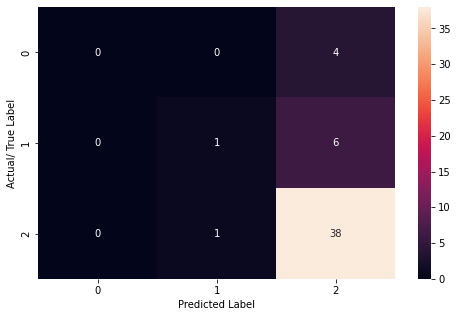

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual/ True Label")
print('INI ADALAH GRAFIK CONFUSION MATRIX SVM')
plt.show()

INI ADALAH GRAFIK CONFUSION MATRIX Naive bayes


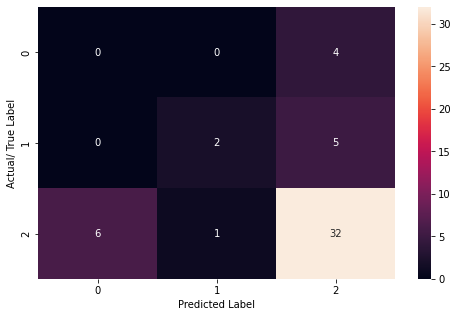

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual/ True Label")
print('INI ADALAH GRAFIK CONFUSION MATRIX Naive bayes')
plt.show()

INI ADALAH GRAFIK CONFUSION MATRIX Adaboost


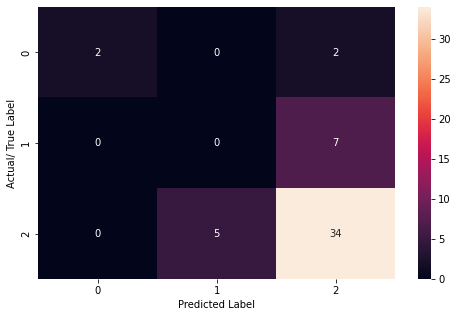

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual/ True Label")
print('INI ADALAH GRAFIK CONFUSION MATRIX Adaboost')
plt.show()

INI ADALAH GRAFIK CONFUSION MATRIX Decision Tree


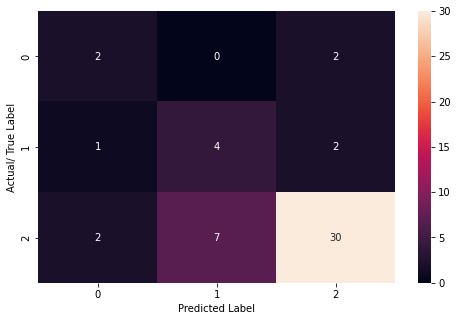

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual/ True Label")
print('INI ADALAH GRAFIK CONFUSION MATRIX Decision Tree')
plt.show()